<a href="https://colab.research.google.com/github/Rafsan7238/CSE474_Lab/blob/main/Lab%202/CSE474_Lab_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSE474 - Lab Task 2**
## **Epidemiology Modelling Using SIR Model**

In [1]:
# import the necessary libraries for the code to work

import numpy as np
import matplotlib.pyplot as plt

## The SIR Model

*SIR model* is a kind of epidemiology model which represents three categories of people:

-   *S*: People who are "susceptible", that is, capable of
    contracting the disease if they come into contact with someone who
    is infected.

-   *I*: People who are "infectious", that is, capable of passing
    along the disease if they come into contact with someone
    susceptible.

-   *R*: People who are "recovered". In the basic version of the
    model, people who have recovered are considered to be immune to
    reinfection. This can also include patients who have died due to infection as they cannot get the infection again anymore. 

Let's think about how the number of people in each category changes over time. Suppose we know that people with the disease are infectious for a period of 4 days, on average. If 100 people are infectious at a
particular point in time, and we ignore the particular time each one
became infected, we expect about 1 out of 4 to recover on any particular day.

Putting that a different way, if the time between recoveries is 4 days, the recovery rate is about 0.25 recoveries per day, which we'll denote with the Greek letter gamma, $\gamma$, or the variable name `gamma`.

If the total number of people in the population is $N$, and the fraction currently infectious is $i$, the total number of recoveries we expect per day is $\gamma i N$.

Now let's think about the number of new infections. Suppose we know that each susceptible person comes into contact with 1 person every 3 days, on average, in a way that would cause them to become infected if the other person is infected. We'll denote this contact rate with the Greek letter beta, $\beta$, or the variables name `beta`.

It's probably not reasonable to assume that we know $\beta$ ahead of
time, but later we'll see how to estimate it based on data from previous outbreaks.

If $s$ is the fraction of the population that's susceptible, $s N$ is
the number of susceptible people, $\beta s N$ is the number of contacts per day, and $\beta s i N$ is the number of those contacts where the other person is infectious.

The model assumes that the population is closed; that is, no one arrives or departs, so the size of the population,  𝑁 , is constant.

## The Equations to be Used:

If we treat time as a continuous quantity, we can write differential
equations that describe the rates of change for $s$, $i$, and $r$ (where $r$ is the fraction of the population that has recovered):

$$\begin{aligned}
\frac{ds}{dt} &= -\beta s i \\
\frac{di}{dt} &= \beta s i - \gamma i\\
\frac{dr}{dt} &= \gamma i\end{aligned}$$ 

To avoid cluttering the equations, I leave it implied that $s$ is a function of time, $s(t)$, and likewise for $i$ and $r$.

## Task 1: The Basic Model

In this model, I am going to define the initial state of the system using a `State` object with state variables `s`, `i`, and `r`. 

Let's assume, initially, the number of susceptible individuals is 95 and there are 5 infected people. These values will be stored in the `State` object as fractions of the total population. 

In [2]:
# This is the State class, that takes in the s, i and r values and returns a State object as a fraction of the values.

class State():

  def __init__(self, s, i, r):
      self.total = s + i + r
      self.s = s / self.total
      self.i = i / self.total
      self.r = r / self.total


In [3]:
# Let's create an initial State object using S=95 and I=5

initial_state = State(95, 5, 0)

Now let us assume we know the time between contacts and time between recoveries. We will create 8 different pairs of these values, and will then use them to populate the initial values of `beta` and `gamma`.  

In [4]:
# time between contacts in days
tc = np.linspace(1,3,8)
# time to recover in days
tr = np.linspace(6,4,8)

# beta and gamma values
beta_list = 1 / tc
gamma_list = 1 / tr

I will create a `System` class that will hold the state and the parameters needed.

In [5]:
class System():

  def __init__(self, state, beta, gamma, total_time):

    self.state = state
    self.beta = beta
    self.gamma = gamma
    # time for simulation
    self.t_end = total_time

Now I will create an update function, that will take in the current state of the system, and compute the state during the next time step. It will make use of the equations I had defined earlier. The function will return a `State` object.  

In [6]:
def update(state, system):

  # fraction of people susceptible, infected and recovered
  s, i, r = state.s, state.i, state.r

  infected = system.beta * i * s
  recovered = system.gamma * i

  # ds/dt = -beta*s*i
  s = s - infected
  # di/dt = beta*s*i - gamma*i
  i = i + infected - recovered
  # dr/dt = gamma*i
  r = r + recovered

  return State(s, i, r)

Now, that our update function is ready, we should create a function to run the simulation. The following function first creates `Numpy Arrays` to store the results.
Next we initialize `state` and the first elements of `S`, `I` and
`R`.

Inside the loop, we use `update` to compute the state of the system at the next time step, then use multiple assignment to unpack the elements of `state`, assigning each to the corresponding `Numpy Array`.

At the end of the function, we return the values `S`, `I`, and `R`.

In [7]:
def run_simulation(system, update):

  # initialise the arrays of simulation time + 1 size
  S = np.zeros(system.t_end + 1)
  I = np.zeros(system.t_end + 1)
  R = np.zeros(system.t_end + 1)

  # populate the first values of S, I, R
  state = system.state
  S[0] = state.s
  I[0] = state.i
  R[0] = state.r

  # update the arrays by calling the update function t_end times
  for time in range(0, system.t_end):
    state = update(state, system)
    S[time + 1], I[time + 1], R[time + 1] = state.s, state.i, state.r

  return S, I, R

We will run the simulation for each system with different `beta` and `gamma` values and plot the infection rate vs time for each pair of these values. For each of the plot, we will also show the maximum infection moment. 

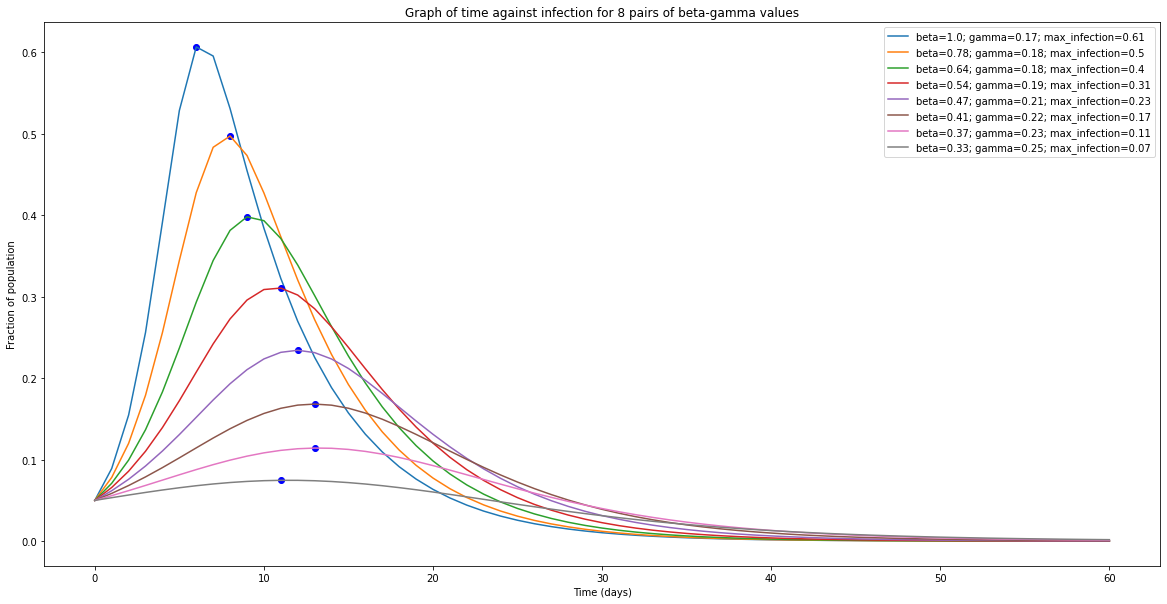

In [8]:
# initialise a plot figure
fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(1, 1, 1)

# run the simulation for 8 pairs of beta and gamma values
for index in range(len(beta_list)):

  beta = beta_list[index]
  gamma = gamma_list[index]
  # setting the simulation time to 60 days
  total_time = 60

  # create a system for each beta-gamma pair and run the simulation
  system = System(state = initial_state, beta = beta, gamma = gamma, total_time = total_time)
  S, I, R = run_simulation(system, update)

  # mark the maximum infection moment with a blue dot.
  max_x = np.argmax(I)
  max_y = I.max()
  ax.plot(max_x, max_y, 'bo')
  # plot infection rate vs time for each pair of these values
  ax.plot(I, label = f'beta={round(system.beta,2)}; gamma={round(system.gamma,2)}; max_infection={round(max_y,2)}')

ax.set_xlabel('Time (days)')
ax.set_ylabel('Fraction of population')
ax.legend()
ax.set_title('Graph of time against infection for 8 pairs of beta-gamma values')
plt.show()

As we can see in the plot above, as the rate of contact (or `beta`) decreases and rate of recovery (or `gamma`) increases, very few people are infected by a disease and vice versa. 

## Task 2: The Sweeping Parameter Model

In the previous model, we have seen the change in infection rate using different fixed known values of `beta` and `gamma`. In this model, we'll explore the behavior of it as we vary these parameters.

First, I need a function that can calculate the total fraction of infected population. This will be calculated by subtracting the final proportion of suscpetible population from the initial proportion. 

In [9]:
def calc_total_infected(system, update):

  S, I, R = run_simulation(system, update)
  total_infected = S[0] - S[-1]

  return total_infected

### Sweeping Beta

As $\beta$ increases, we expect the total number of infections to
increase. To quantify that relationship, I'll create a range of values
for $\beta$ and some fixed values for $\gamma$:

In [10]:
beta_array = np.linspace(0.1, 1.0, 20)
gamma_array = [0.2, 0.4, 0.6, 0.8, 1.0]

The following function takes `state`, `beta_array` and `gamma` as parameters.
It runs the simulation for each value of `beta` and computes the fraction of the population that gets infected.

The result is a `List` that contains the fraction of infected people for each value of `beta`.

Please note that we will be using the same initial state and simulation time as in the previous model. 

In [11]:
def sweep_beta(state, beta_array, gamma):
    # create a sweep list to contain infected fraction for sweeping values of beta
    sweep = []
    for beta in beta_array:
        system = System(state, beta, gamma, 60)
        # append the result of 'calc_total_infected' to the sweep list
        sweep.append(calc_total_infected(system, update))
      
    return sweep

Now, we will run the above function for each value in the `gamma_array` and plot the graph of fraction of infected population vs `beta` for each of those values. 

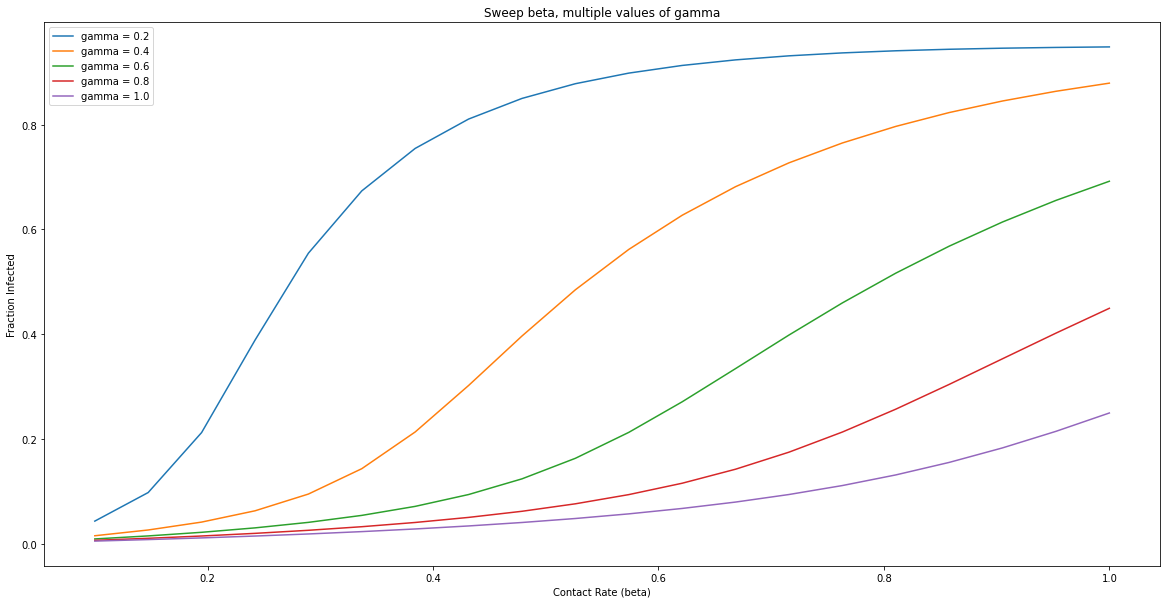

In [12]:
# initialise a plot figure
fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(1, 1, 1)

# run the simulation and plot the result for the gamma values
for gamma in gamma_array:
    infected_sweep_beta = sweep_beta(initial_state, beta_array, gamma)
    ax.plot(beta_array, infected_sweep_beta, label=f'gamma = {gamma}')

ax.set_xlabel('Contact Rate (beta)')
ax.set_ylabel('Fraction Infected')
ax.legend()
ax.set_title('Sweep beta, multiple values of gamma')
plt.show()

As assummed previously, when the value of `beta` or the contact rate increases, it raises the proportion of infected population. 

However, with increasing value of `gamma`, the maximum infected proportion decreases. 

### Sweeping Gamma

As $\gamma$ increases, we expect the total number of infections to
increase. To quantify that relationship, I'll create a range of values
for $\gamma$ and some fixed values for $\beta$:

In [13]:
beta_array = [0.2, 0.4, 0.6, 0.8, 1.0]
gamma_array = np.linspace(0.1, 1.0, 20)

The following function takes `state`, `gamma_array` and `beta` as parameters.
It runs the simulation for each value of `gamma` and computes the fraction of the population that gets infected.

The result is a `List` that contains the fraction of infected people for each value of `gamma`.

Please note that we will be using the same initial state and simulation time as in the previous model. 

In [14]:
def sweep_gamma(state, beta, gamma_array):
    # create a sweep list to contain infected fraction for sweeping values of gamma
    sweep = []
    for gamma in gamma_array:
        system = System(state, beta, gamma, 60)
        # append the result of 'calc_total_infected' to the sweep list
        sweep.append(calc_total_infected(system, update))
      
    return sweep

Now, we will run the above function for each value in the `beta_array` and plot the graph of fraction of infected population vs `gamma` for each of those values. 

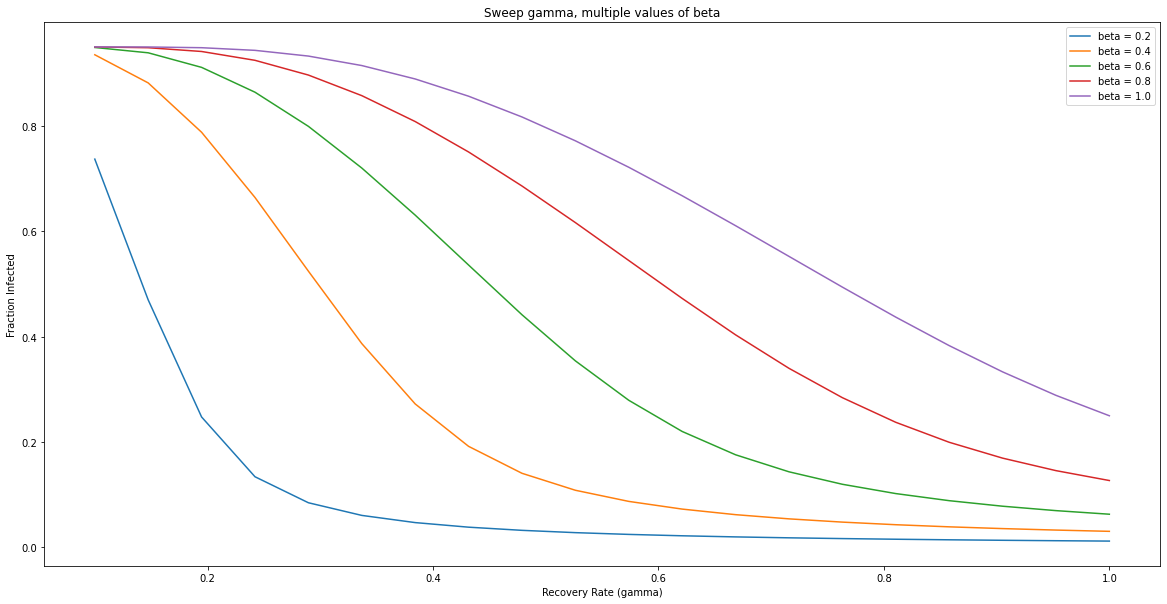

In [15]:
# initialise a plot figure
fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(1, 1, 1)

# run the simulation and plot the result for the beta values
for beta in beta_array:
    infected_sweep_gamma = sweep_gamma(initial_state, beta, gamma_array)
    ax.plot(gamma_array, infected_sweep_gamma, label=f'beta = {beta}')

ax.set_xlabel('Recovery Rate (gamma)')
ax.set_ylabel('Fraction Infected')
ax.legend()
ax.set_title('Sweep gamma, multiple values of beta')
plt.show()

As assummed previously, when the value of `gamma` or the recovery rate increases, it reduces the proportion of infected population. 

However, with increasing value of `beta`, the maximum infected proportion increases. 

## Task 3: The Vaccination Model

In this model, we'll explore the effect of vaccination on epidemiology. For this, we'll divide the total population into four components: *S*, *I*, *R*, and *V* (for vaccinated).

Let's assign the rate of vaccination with `alpha` $\alpha$. Then,

$$\begin{aligned}
\frac{dv}{dt} &= \alpha s^{2} \\
\frac{ds}{dt} &= -\beta s i - \alpha s^{2}\\
\end{aligned}$$ 

where, v is the fraction of the population vaccinated. 

In this model, I am going to define the initial state of the system using a `State_Vaccine` object with state variables `s`, `i`, `r` and `v`. 

Let's assume, initially, the number of susceptible individuals is 95 and there are 5 infected people. These values will be stored in the `State_Vaccine` object as fractions of the total population. 

In [16]:
# This is the State_Vaccine class, that takes in the s, i, r and v values and returns a State_Vaccine object as a fraction of the values.

class State_Vaccine():

  def __init__(self, s, i, r, v):
      self.total = s + i + r + v
      self.s = s / self.total
      self.i = i / self.total
      self.r = r / self.total
      self.v = v / self.total


In [17]:
# Let's create an initial State object using S=95 and I=5

initial_state = State_Vaccine(95, 5, 0, 0)

Now we will use fixed values for contact, recovery and vaccination rates and set the `beta`, `gamma` and `alpha` values accordingly. 

In [18]:
beta = 0.5
gamma = 0.20
alpha = 0.10

I will create a `System_Vaccine` class that will hold the state and the parameters needed.

In [19]:
class System_Vaccine():

  def __init__(self, state, beta, gamma, alpha, total_time):

    self.state = state
    self.beta = beta
    self.gamma = gamma
    self.alpha = alpha
    self.t_end = total_time

Now I will create a new update function, that will take in the current state of the system, and compute the state during the next time step. It will make use of the equations I had defined earlier. The function will return a `State_Vaccine` object.  

In [20]:
def update_vaccine(state_vaccine, system_vaccine):

  # fraction of people susceptible, infected and recovered
  s, i, r, v = state_vaccine.s, state_vaccine.i, state_vaccine.r, state_vaccine.v

  infected = system_vaccine.beta * i * s
  recovered = system_vaccine.gamma * i
  vaccinated = system_vaccine.alpha * s ** 2

  # ds/dt = -beta*s*i - alpha*s^2
  s = s - infected - vaccinated
  # di/dt = beta*s*i - gamma*i
  i = i + infected - recovered
  # dr/dt = gamma*i
  r = r + recovered
  # dv/dt = alpha*s^2
  v = v + vaccinated

  return State_Vaccine(s, i, r, v)

Now, that our update function is ready, we should create a function to run the simulation. The following function first creates `Numpy Arrays` to store the results.
Next we initialize `state_vaccine` and the first elements of `S`, `I`,
`R` and `V`.

Inside the loop, we use `update_vaccine` to compute the state of the system at the next time step, then use multiple assignment to unpack the elements of `state_vaccine`, assigning each to the corresponding `Numpy Array`.

At the end of the function, we return the values `S`, `I`, `R` and `V`.

In [21]:
def run_simulation_vaccine(system_vaccine, update_vaccine):

  # initialise the arrays of simulation time + 1 size
  S = np.zeros(system_vaccine.t_end + 1)
  I = np.zeros(system_vaccine.t_end + 1)
  R = np.zeros(system_vaccine.t_end + 1)
  V = np.zeros(system_vaccine.t_end + 1)

  # populate the first values of S, I, R and V
  state_vaccine = system_vaccine.state
  S[0] = state_vaccine.s
  I[0] = state_vaccine.i
  R[0] = state_vaccine.r
  V[0] = state_vaccine.v

  # update the arrays by calling the update function t_end times
  for time in range(0, system_vaccine.t_end):
    state_vaccine = update_vaccine(state_vaccine, system_vaccine)
    S[time + 1], I[time + 1], R[time + 1], V[time + 1] = state_vaccine.s, state_vaccine.i, state_vaccine.r, state_vaccine.v

  return S, I, R, V

We will now run the simulation for our system, and plot the graph of s, i, r, and v with time. 

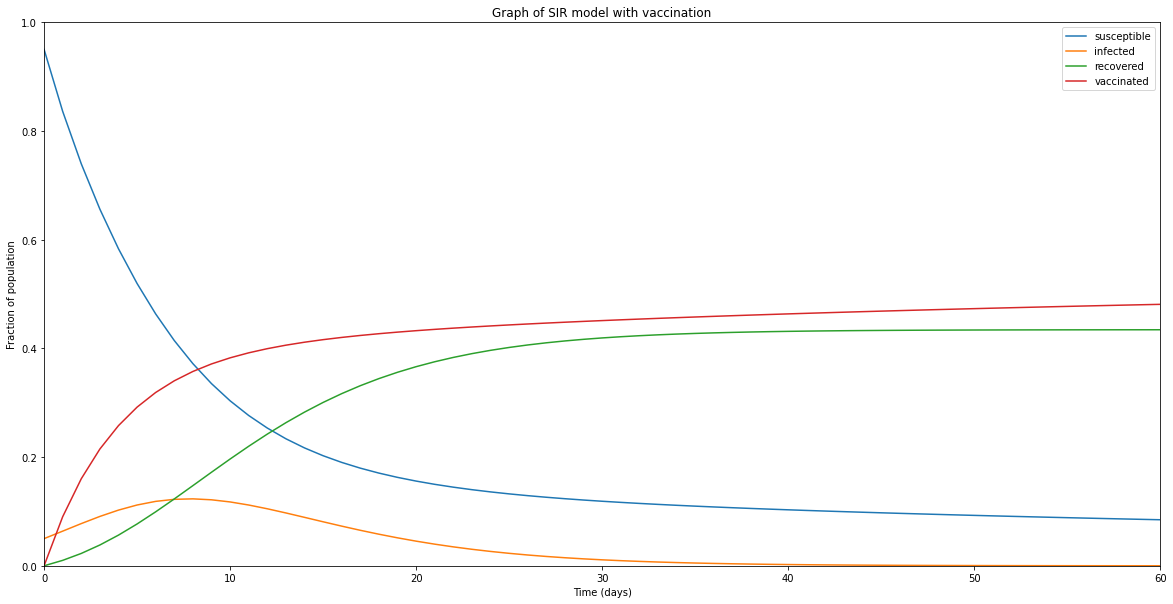

In [22]:
# initialise a plot figure
fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(1, 1, 1)

# run the simulation
system_vaccine = System_Vaccine(initial_state, beta, gamma, alpha, 60)
S, I, R, V = run_simulation_vaccine(system_vaccine, update_vaccine)

ax.plot(S, label='susceptible')
ax.plot(I, label='infected')
ax.plot(R, label='recovered')
ax.plot(V, label='vaccinated')

ax.set_xlabel('Time (days)')
ax.set_ylabel('Fraction of population')
ax.set_ylim([0,1])
ax.set_xlim([0,60])
ax.legend()
ax.set_title('Graph of SIR model with vaccination')
plt.show()

As we can see, with a vaccination rate of only 10%, the proportion of infected people and susceptible people have fallen drastically even with high contact_rate of 0.5 and low recovery_rate of 0.2. This is sometimes referred to as *herd immunity*. 

This goes on to show the effectiveness of vaccination to control an epidemic.

## Summary

Throughout this notebook, we have seen the modelling and simulation of an epidemic. We used a SIR Model, a kind of epidemiology model which represents three categories of people:

-   *S*: People who are "susceptible", that is, capable of
    contracting the disease if they come into contact with someone who
    is infected.

-   *I*: People who are "infectious", that is, capable of passing
    along the disease if they come into contact with someone
    susceptible.

-   *R*: People who are "recovered". In the basic version of the
    model, people who have recovered are considered to be immune to
    reinfection. This can also include patients who have died due to infection as they cannot get the infection again anymore. 



We defined the parameters of `beta` and `gamma` as contact rate and recovery rate rescpectively, and the equations that would be used to define the change in each category of the model with rescpect to time. 


We started off with a base model, with fixed values of `beta` and `gamma` to show the relationship of those values with the proportion of infected people in a fixed and closed population. 

We then went a step farther, and viewed that relationship with sweeping values of the parameters to represent the uncertainty when deciding a value for `beta` and `gamma` and how they can affect the results if chosen inappropriately. 


Finally, we introduced a fourth category of people into the mix: *V* - People who are vaccinated, and a new parameter `alpha` which is the vaccination rate. We redefined the equations for the model, and used a fixed `alpha` value to show the effectiveness of vaccination to control an epidemic. 